# Video Games Sales - EDA

We will be using dataset that contains a list of video games with sales greater than 100,000 copies. All data is from 1980 till 2017. It was generated by a scrape of vgchartz.com. 

#### The purpose of this EDA will be to identify the top games, genres, platforms and sales across time

<div>
<img src="zen-playing-old-video-games.jpg" width="700"/>
</div>

**Fun Fact:**
The Game Boy version of Tetris was the first game played in space. In 1993, Tetris traveled aboard a Soyuz TM-17 rocket to the MIR Space Station, where it was played by Russian cosmonaut Aleksandr A. Serebrov. The game was later sold at an auction for $1,220.

# Reading and Understanding Data

In [1]:
#suppress warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read data
data = pd.read_csv('vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Columns are:

1. Rank - Ranking of overall sales

2. Name - The games name

3. Platform - Platform of the games release (i.e. PC,PS4, etc.)

4. Year - Year of the game's release

5. Genre - Genre of the game

6. Publisher - Publisher of the game

7. NA_Sales - Sales in North America (in millions)

8. EU_Sales - Sales in Europe (in millions)

9. JP_Sales - Sales in Japan (in millions)

10. Other_Sales - Sales in the rest of the world (in millions)

11. Global_Sales - Total worldwide sales.

In [3]:
data.shape

(16598, 11)

Dataframe has 16598 rows and 11 columns

In [4]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


maximum year is 2020, which is a mistake since data was only collected till 2017

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


We can see that there are some missing values in Year and Publisher columns. Since amount is not significant we can just drop those rows. 

We have float, integer and object data types.

In [6]:
data['Genre'].value_counts().head(8)

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Name: Genre, dtype: int64

Most popular genres are Action, Sports and Misc (that can be anything). One interesting value comes up as "platform" with 886 values. These are obviously missing platform specification; We can think of what to do with those rows

In [7]:
data['Platform'].value_counts().head(8)

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
Name: Platform, dtype: int64

Most popular Platform is Nintendo, followed by PS2 and PS3.

In [8]:
data['Publisher'].value_counts().head(8)

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Name: Publisher, dtype: int64

Most popular publisher is "Electronic Arts", followed with "Activision" and "Namco Bandai Games". 

**Another Fun Fact**: 
The urban legend – that turned out to be true – was that Atari had so many unsold copies [of E.T. the Extra Terrestrial] that they buried them in the desert. A documentary crew actually went out and dug them up!
Most of the above mentioned E.T. games (which originally wouldn’t sell) were eventually sold on Ebay for a total of around $108,000.

# Data Cleaning

In [9]:
#remove null rows
data.dropna(inplace=True)

#make year to int
data['Year']=data['Year'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int32  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


In [10]:
data[data['Year'] > 2017]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


After checking the game was actually released in 2009, so we can input that instead.

In [56]:
data['Year'][data['Year'] > 2017] = 2009
data[data['Name'] == 'Imagine: Makeup Artist']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2009,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


In [13]:
len(data[data['Genre'] == 'Platform'])

875

Let's just leave genre for now and see later If we would need to remove it and if it creates problems with calculation.

**Fun Fact**: The Little Sisters from BioShock didn't start their life as little girls at all, but rather tiny mole-like creatures who scuttled around Rapture collecting Adam. Early concept art also shows them as retro '50s-style robots, too

# Exploratory Data Analysis

## All Statistics

In [14]:
print("Number of Genres:", len(data['Genre'].unique()))
print()
print("Number of Platforms:", len(data['Platform'].unique()))
print()
print("Number of Publishers:", len(data['Publisher'].unique()))

Number of Genres: 12

Number of Platforms: 31

Number of Publishers: 576


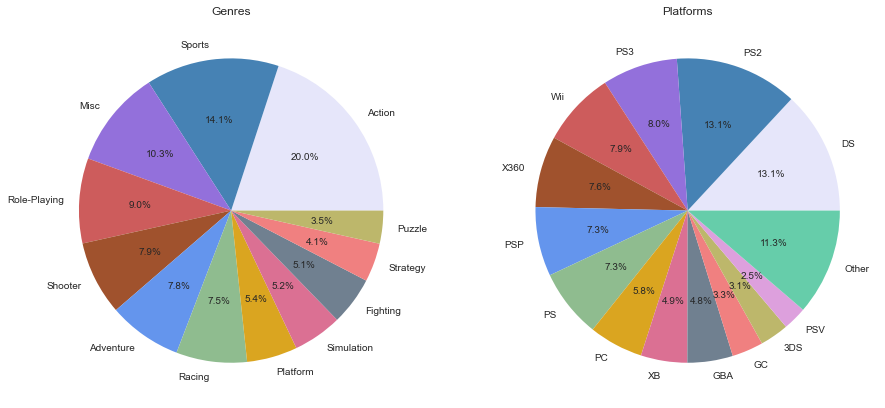

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(15,15))
colors = ["lavender", "steelblue",'mediumpurple', "indianred", "sienna", 'cornflowerblue', 'darkseagreen', 'goldenrod', 
          'palevioletred','slategray','lightcoral','darkkhaki','plum','mediumaquamarine']


plt.subplot(1, 2, 1)
ax = data['Genre'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Genres', label = '', colors = colors)

platforms = data['Platform'].value_counts()
other = 0
for index, value in platforms.items():
    if value < 400:
        other += value
        platforms.drop(index, inplace=True)
platforms['Other'] = other
plt.subplot(1, 2, 2)
ax2 = platforms.plot(kind='pie', autopct='%1.1f%%', title = 'Platforms', label ='',colors = colors)

plt.show()


## Sales By Platform

Text(0, 0.5, 'Global Sales')

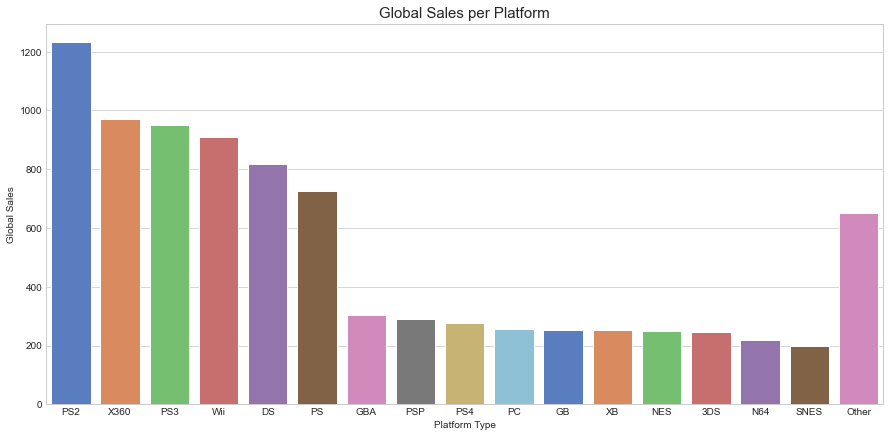

In [22]:
platf_sales = data.groupby('Platform')['Global_Sales'].agg(np.sum)
other = 0
       
platf_sales = pd.DataFrame({'Platform':platf_sales.index, 'Sales':platf_sales.values})

for index, row in platf_sales.iterrows():
    if row['Sales'] < 200:
        other += row['Sales']
        platf_sales.drop(index, inplace=True)

platf_sales.sort_values('Sales', inplace=True, ascending = False)
new_row = {'Platform':'Other', 'Sales':other}
platf_sales= platf_sales.append(new_row, ignore_index=True)

#Seaborn barplot
sns.set_style("whitegrid")
ax = plt.subplots(figsize=(15,7))

ax = sns.barplot(x ='Platform', y='Sales', data=platf_sales, ci=None, palette="muted",orient='v' )
ax.set_title("Global Sales per Platform", fontsize=15)
ax.set_xlabel ("Platform Type")
ax.set_ylabel ("Global Sales")

Let's take first 6 most sold platforms and see how they compare in regions

Text(0, 0.5, 'Regional Sales')

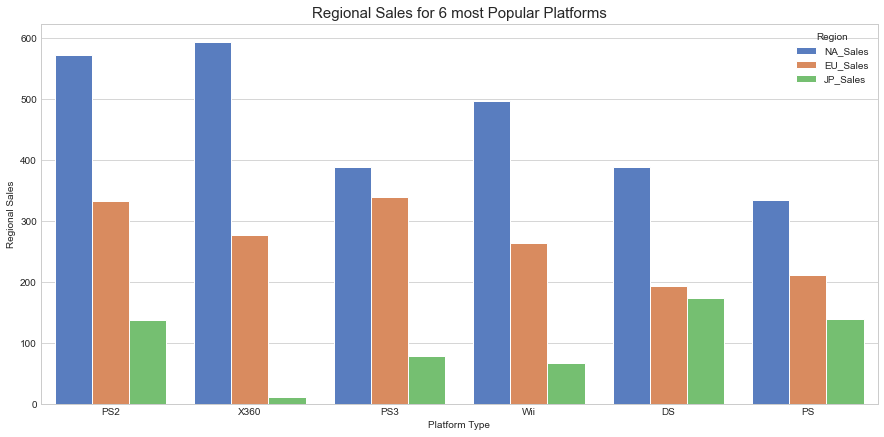

In [23]:
top_platform_sales = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
NA_sales_platform = []
EU_sales_platform = []
JP_sales_platform = []

for i in top_platform_sales:
    sum_NA = round(data[data['Platform'] == i]['NA_Sales'].sum(),1)
    NA_sales_platform.append(sum_NA)
    sum_EU = round(data[data['Platform'] == i]['EU_Sales'].sum(),1)
    EU_sales_platform.append(sum_EU)
    sum_JP = round(data[data['Platform'] == i]['JP_Sales'].sum(),1)
    JP_sales_platform.append(sum_JP)
          
top_platform_sales_df = pd.DataFrame({'Platform': top_platform_sales, 'Sales': NA_sales_platform, 'Region': 'NA_Sales'}) 
top_platform_sales_df = top_platform_sales_df.append(pd.DataFrame({'Platform': top_platform_sales, 'Sales': EU_sales_platform, 'Region': 'EU_Sales'}) )
top_platform_sales_df = top_platform_sales_df.append(pd.DataFrame({'Platform': top_platform_sales, 'Sales': JP_sales_platform, 'Region': 'JP_Sales'}) )

top_platform_sales_df
ax = plt.subplots(figsize=(15,7))

sns.set_style("whitegrid")
ax = sns.barplot(x="Platform", y="Sales", hue="Region", data=top_platform_sales_df,ci=None, palette="muted")
ax.set_title("Regional Sales for 6 most Popular Platforms", fontsize=15)
ax.set_xlabel ("Platform Type")
ax.set_ylabel ("Regional Sales")

We can see North America has most sales, most popular platforms being X360 and PS2.

While in EU most popular ones are PS3 and PS2. 

In Japan Nintendo DS has most sales followed by PS and PS2

## Sales by Genre

Text(0, 0.5, 'Global Sales')

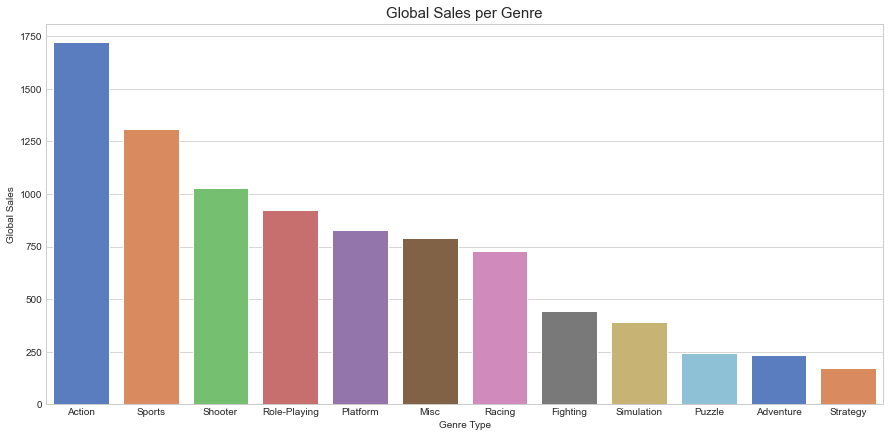

In [24]:
genre_sales = data.groupby('Genre')['Global_Sales'].agg(np.sum)

genre_sales = pd.DataFrame({'Genre':genre_sales.index, 'Sales':genre_sales.values})

genre_sales.sort_values('Sales', inplace=True, ascending = False)

#Seaborn barplot
sns.set_style("whitegrid")
ax = plt.subplots(figsize=(15,7))

ax = sns.barplot(x ='Genre', y='Sales', data=genre_sales, ci=None, palette="muted",orient='v' )
ax.set_title("Global Sales per Genre", fontsize=15)
ax.set_xlabel ("Genre Type")
ax.set_ylabel ("Global Sales")

Most money was made by Action and Sports genre, which is also most popular type. While miscelaneous had third place in terms of frequency, it seems it did not cost as much compared to other games.

Now let's choose first 4 most sold out or expensive game types. And analyse them by Region

Text(0, 0.5, 'Regional Sales')

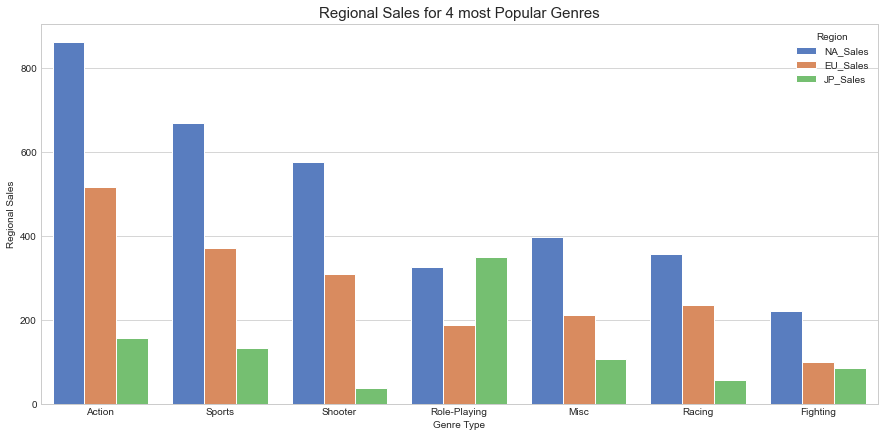

In [55]:
top_genre_sales = ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Misc', 'Racing', 'Fighting']
NA_sales_genre = []
EU_sales_genre = []
JP_sales_genre = []

for i in top_genre_sales:
    sum_NA = round(data[data['Genre'] == i]['NA_Sales'].sum(),1)
    NA_sales_genre.append(sum_NA)
    sum_EU = round(data[data['Genre'] == i]['EU_Sales'].sum(),1)
    EU_sales_genre.append(sum_EU)
    sum_JP = round(data[data['Genre'] == i]['JP_Sales'].sum(),1)
    JP_sales_genre.append(sum_JP)
          
top_genre_sales_df = pd.DataFrame({'Genre': top_genre_sales, 'Sales': NA_sales_genre, 'Region': 'NA_Sales'}) 
top_genre_sales_df = top_genre_sales_df.append(pd.DataFrame({'Genre': top_genre_sales, 'Sales': EU_sales_genre, 'Region': 'EU_Sales'}) )
top_genre_sales_df = top_genre_sales_df.append(pd.DataFrame({'Genre': top_genre_sales, 'Sales': JP_sales_genre, 'Region': 'JP_Sales'}) )

ax = plt.subplots(figsize=(15,7))

sns.set_style("whitegrid")
ax = sns.barplot(x="Genre", y="Sales", hue="Region", data=top_genre_sales_df ,ci=None, palette="muted")
ax.set_title("Regional Sales for 4 most Popular Genres", fontsize=15)
ax.set_xlabel ("Genre Type")
ax.set_ylabel ("Regional Sales")

Action and Sports are both popular in North America and Europe, while Role-Playing is most popular in Japan

## Sales by Year

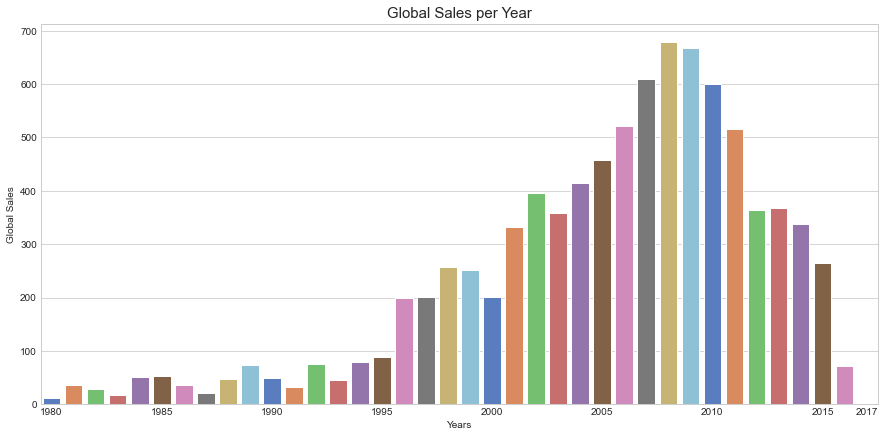

In [27]:
year_sales = data.groupby('Year')['Global_Sales'].agg(np.sum)

year_sales = pd.DataFrame({'Year':year_sales.index, 'Sales':year_sales.values})

#year_sales.sort_values('Sales', inplace=True, ascending = False)

#Seaborn barplot
sns.set_style("whitegrid")
ax = plt.subplots(figsize=(15,7))

ax = sns.barplot(x ='Year', y='Sales', data=year_sales, ci=None, palette="muted",orient='v' )
ax.set(xticklabels=['1980', '', '', '', '', '1985', '', '', '', '', '1990', '' ,'','','','1995','','','','','2000',
                   '','','','','2005','','','','','2010','','','','','2015','','2017'])
ax.set_title("Global Sales per Year", fontsize=15)
ax.set_xlabel ("Years")
ax.set_ylabel ("Global Sales")

plt.show()

Video games started to get more popular globally after 1195, reaching it's peak to 2008-2010

### Regional Sales per Year

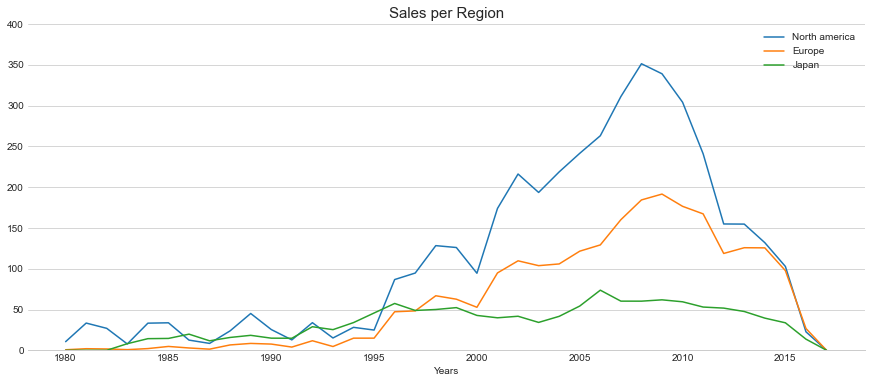

In [50]:
year_sales_NA = data.groupby('Year')['NA_Sales'].agg(np.sum)
year_sales_NA = pd.DataFrame({'Year':year_sales_NA.index, 'Sales':year_sales_NA.values})

year_sales_EU = data.groupby('Year')['EU_Sales'].agg(np.sum)
year_sales_EU = pd.DataFrame({'Year':year_sales_EU.index, 'Sales':year_sales_EU.values})

year_sales_JP = data.groupby('Year')['JP_Sales'].agg(np.sum)
year_sales_JP = pd.DataFrame({'Year':year_sales_JP.index, 'Sales':year_sales_JP.values})

#Seaborn barplot
sns.set_style("whitegrid")
ax = plt.subplots(figsize=(15,6))


ax = sns.lineplot(x ='Year', y='Sales', data=year_sales_NA, label = 'North america')
ax = sns.lineplot(x ='Year', y='Sales', data=year_sales_EU,palette="muted", label = 'Europe')
ax = sns.lineplot(x ='Year', y='Sales', data=year_sales_JP, label = 'Japan' )
ax.set_title("Sales per Region", fontsize=15)
ax.set_xlabel ("Years")
ax.set_ylabel ("")
ax.set(ylim=(0, 400))

ax.xaxis.grid(False)
sns.despine(left=True)

plt.show()

While North America made most money, distribution resembles Europe Sales. Both had same peaks.

In Japan We don't observe peak but more a wave sort. one peak around 1199 and second around 2008.

## Top Publishers

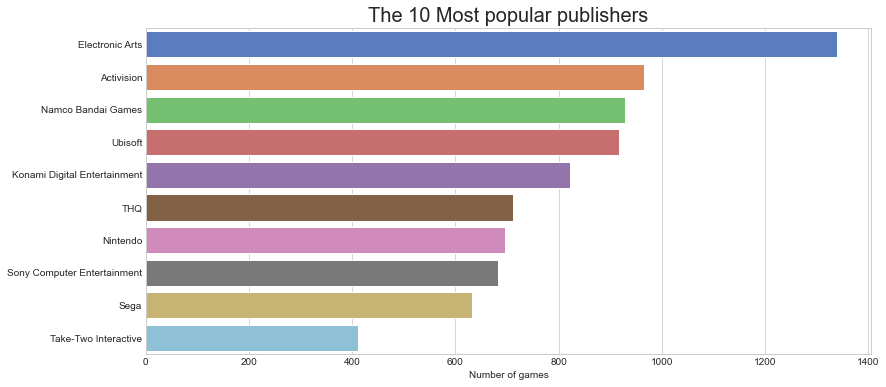

In [52]:
top10_publishers = data['Publisher'].value_counts().head(10)

sns.set_style("whitegrid")
ax = plt.subplots(figsize=(13,6))

sns.barplot(x=top10_publishers.values, y=top10_publishers.index, palette='muted')
plt.title('The 10 Most popular publishers', fontsize=20)
plt.xlabel('Number of games');

**Last Fun Fact:** The name Atari comes from the Chinese game Go. 'Atari' refers to a situation where a stone or a group of stones is in imminent danger of being taken by another player; a state Atari ironically found themselves in when the brand was bought by French company Infogrames.